# Community alignment of training questions

In [1]:
%matplotlib inline

In [38]:
import pandas as pd
pd.set_option('display.max_columns', None)
from ollama_models import ollama_models
models = ollama_models()

In [3]:
from community_alignment import community_alignment

Loaded existing index from forecast_index.faiss
Index contains 5717 vectors at initialization


100%|██████████████████████████████████████| 709/709 [00:00<00:00, 28615.60it/s]


saved community_gemma3:latest.json


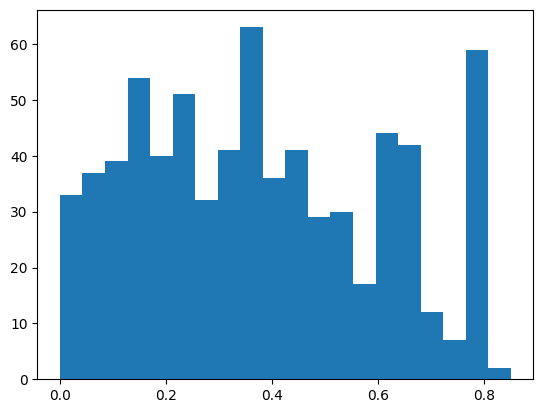

In [4]:
dfs = {}
for model in models:
    model = 'gemma3:latest' # hack, need to rerun
    df = community_alignment(model)
    dfs[model] = df

In [6]:
for model in models:
    model = 'gemma3:latest' # hack, need to rerun
    df = dfs[model]
    df1 = df[['model', 'id', 'title', 'error']].sort_values(by='id')
    display(df1)

,model,id,title,error
20,gemma3:latest,111,Will there be a total solar eclipse on June 25...,0.600
36,gemma3:latest,161,Will the Universe end?,0.020
89,gemma3:latest,349,Will SpaceX land people on Mars before 2030?,0.348
90,gemma3:latest,353,Will someone born before 2001 live to be 150?,0.110
98,gemma3:latest,372,Will human brain emulation be the first succes...,0.235
...,...,...,...,...
681,gemma3:latest,28570,"Will there be a global recession before 2026, ...",0.250
2,gemma3:latest,28682,Will any country trigger article 50 to leave t...,0.220
64,gemma3:latest,30959,Will the US Department of Health and Human Ser...,0.400
65,gemma3:latest,30960,"Will CDC report 10,000 or more H5 avian influe...",0.620


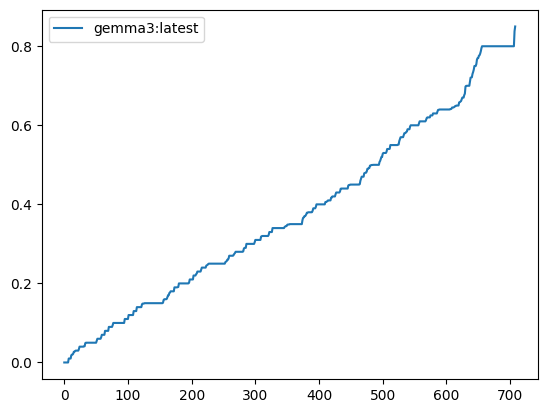

In [8]:
import matplotlib.pylab as plt
errors = []
for model in models:
    model = 'gemma3:latest' # hack, need to rerun
    df = dfs[model]
    errors.append((model, df.error.median()))
    plt.plot(sorted(df['error'].values.tolist()), label=model)
plt.legend();

In [10]:
import json
with open('id_to_category.json', 'r') as f:
    id_to_category = json.load(f)

In [11]:
set(id_to_category.values())

{'Astronomical Research',
 'Biological Research',
 'Biology and Life Sciences',
 'Cosmology and Astronomy',
 'Cultural Trends',
 'Demographic Growth',
 'Economic Trends',
 'Environmental Disasters',
 'Environmental Predictions',
 'Environmental Science',
 'Extraterrestrial Life',
 'Global Security',
 'Healthcare Innovation',
 'Legal and Ethical Issues',
 'Population Trends',
 'Public Health',
 'Risk Assessment',
 'Scientific Progress',
 'Space Exploration',
 'Space Phenomena',
 'Sports and Recreation',
 'Technology Innovation'}

In [12]:
for id in id_to_category:
    if 'Environ' in id_to_category[id]:
        id_to_category[id] = 'Environment'

In [13]:
set(id_to_category.values())

{'Astronomical Research',
 'Biological Research',
 'Biology and Life Sciences',
 'Cosmology and Astronomy',
 'Cultural Trends',
 'Demographic Growth',
 'Economic Trends',
 'Environment',
 'Extraterrestrial Life',
 'Global Security',
 'Healthcare Innovation',
 'Legal and Ethical Issues',
 'Population Trends',
 'Public Health',
 'Risk Assessment',
 'Scientific Progress',
 'Space Exploration',
 'Space Phenomena',
 'Sports and Recreation',
 'Technology Innovation'}

In [14]:
df1

,model,id,title,error
20,gemma3:latest,111,Will there be a total solar eclipse on June 25...,0.600
36,gemma3:latest,161,Will the Universe end?,0.020
89,gemma3:latest,349,Will SpaceX land people on Mars before 2030?,0.348
90,gemma3:latest,353,Will someone born before 2001 live to be 150?,0.110
98,gemma3:latest,372,Will human brain emulation be the first succes...,0.235
...,...,...,...,...
681,gemma3:latest,28570,"Will there be a global recession before 2026, ...",0.250
2,gemma3:latest,28682,Will any country trigger article 50 to leave t...,0.220
64,gemma3:latest,30959,Will the US Department of Health and Human Ser...,0.400
65,gemma3:latest,30960,"Will CDC report 10,000 or more H5 avian influe...",0.620


In [20]:
id_to_category = {int(x): id_to_category[x] for x in id_to_category}

In [22]:
df['category'] = df.id.apply(lambda x: id_to_category[x])

In [24]:
df1 = df[['category', 'error']]

In [25]:
df1

,category,error
0,Technology Innovation,0.350000
1,Global Security,0.340000
2,Global Security,0.220000
3,Global Security,0.384000
4,Economic Trends,0.280000
...,...,...
704,Extraterrestrial Life,0.575000
705,Economic Trends,0.721429
706,Economic Trends,0.645000
707,Biological Research,0.800000


In [26]:
result_df = df1.groupby('category').agg(
    mean_error=('error', 'mean'),
    count=('error', 'size')
).reset_index()

In [28]:
result_df.sort_values(by='mean_error')

,category,mean_error,count
10,Healthcare Innovation,0.000000,1
2,Biology and Life Sciences,0.200000,2
16,Space Exploration,0.291207,3
3,Cosmology and Astronomy,0.316667,3
17,Space Phenomena,0.324750,4
9,Global Security,0.333865,227
18,Sports and Recreation,0.362667,3
13,Public Health,0.364756,37
15,Scientific Progress,0.390667,6
19,Technology Innovation,0.391754,222


In [41]:
ds = models[0]
ds

'deepseek-r1:1.5b-qwen-distill-q4_K_M'

In [42]:
!mkdir forecast_{ds}

mkdir: cannot create directory ‘forecast_deepseek-r1:1.5b-qwen-distill-q4_K_M’: File exists


In [43]:
for id in df[df.category == 'Economic Trends'].id.values:
    print(f'python forecast_question_in_model.py {id} {ds}')

python forecast_question_in_model.py 16404 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 12348 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 26721 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 14441 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 4215 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 10359 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 8313 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 14456 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 6304 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 18664 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 8509 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 10574 deepseek-r1:1.5b-qwen-distill-q4_K_M
python forecast_question_in_model.py 8538 de

In [40]:
models

['deepseek-r1:1.5b-qwen-distill-q4_K_M']